In [2]:
import pandas as pd

In [3]:
filepath= r'D:\Academics\6th semester\Machine Learning\LAB\LAB-2\gender_classification_v7.csv'

In [4]:
df=pd.read_csv(filepath)

In [5]:
df.info

<bound method DataFrame.info of       long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long   
0             1               11.8                 6.1          1          0  \
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      l

In [7]:
# Data of values(Max, min, std...)
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Visualization of correlation result with seaborn library heatmap.
import matplotlib.pyplot as plt

In [12]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [13]:
#checking null values
df.isnull().sum()*100/df.shape[0]

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

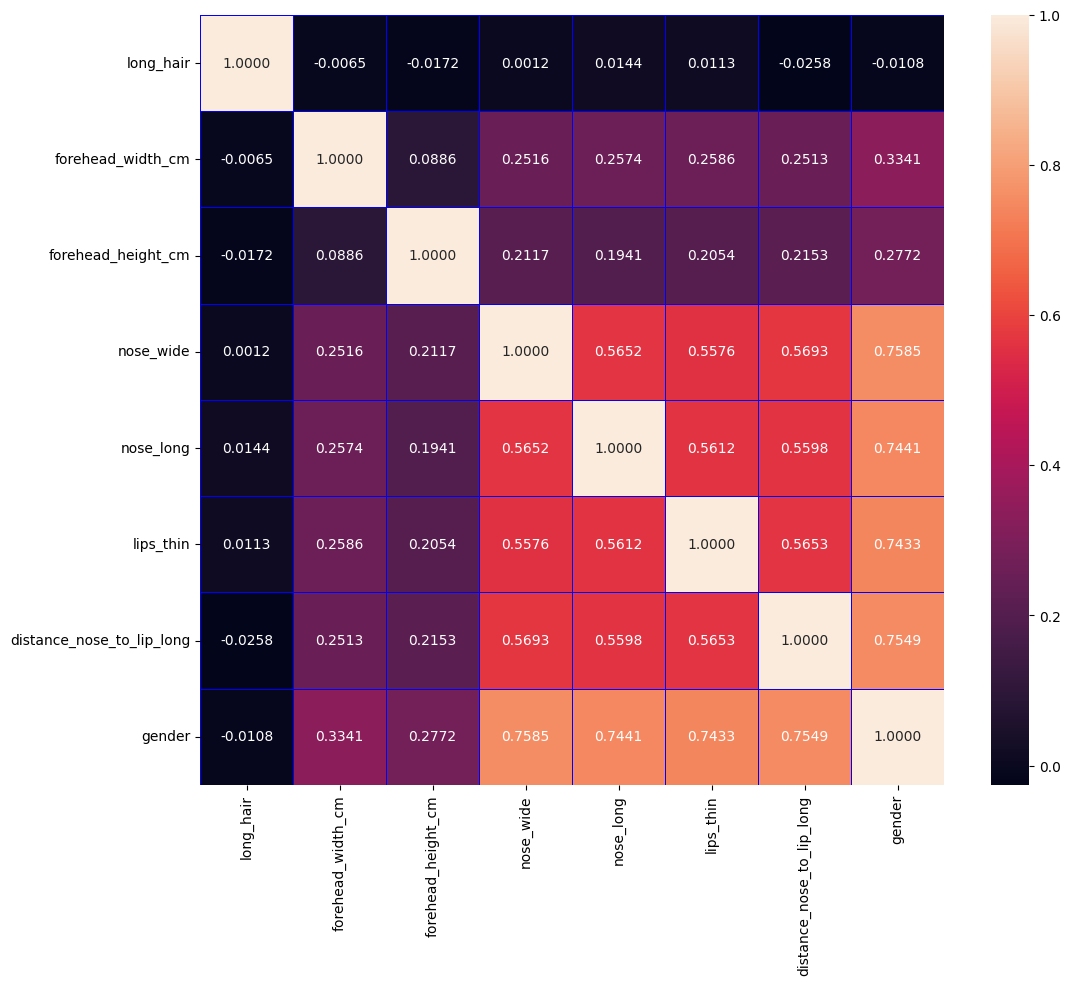

In [38]:
# Visualization of correlation result with seaborn library heatmap.
import seaborn as sns
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

In [22]:
# Change gender type
# Male : 1
# Female : 0
df.gender = [1 if i == "Male" else 0 for i in df.gender]

In [23]:
# x_data
x_data = df.drop(["gender"],axis = 1)
# y_data
y_data = df.gender.values

In [24]:
x_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [25]:
y_data

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [26]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=1)

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", gnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", gnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.97
print Test for accuracy of NBC algo:  0.9713524317121919


In [29]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


In [32]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


In [34]:
y_pred_train = gnb.predict(x_train)

y_pred_train

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [40]:
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.9700
Test set score: 0.9714


In [41]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4768,1,13.0,6.4,0,0,0,0
65,1,11.8,5.1,0,0,1,1
177,1,12.0,5.5,1,1,1,1
4489,1,12.4,6.1,1,1,1,1
3889,1,14.0,6.6,1,1,1,1
...,...,...,...,...,...,...,...
2895,0,15.5,6.6,1,1,1,1
2763,1,13.6,6.1,0,0,0,0
905,1,13.4,5.5,0,0,0,0
3980,1,13.7,5.7,0,1,1,1
